In [1]:
import networkx as nx
import numpy as np
import string
import matplotlib.pyplot as plt
import osmnx as ox
import pandas as pd
import pickle

In [2]:
city = 'Manhattan'
mode = 'hot'
jitter = 0.05

vary_param = 'trafficlight'
param_values = [10, 15, 20, 25, 30, 35, 40]
default_value = 20


In [3]:
with open(f'../data/sensitivity_analysis/results_routes_{city}_{mode}_{vary_param}_{default_value}_jitter{jitter}.pkl', 'rb') as f:
    default_routes = pickle.load(f)

default_routes = [list(route.values()) for route in default_routes]
len(default_routes)

1008

## Number of shared routes

In [24]:
default_set = set(tuple(row) for row in default_routes)
len(default_set)

489

In [25]:
shared_route_dict = {}
for val in param_values:
    with open(f'../data/sensitivity_analysis/results_routes_{city}_{mode}_{vary_param}_{val}_jitter{jitter}.pkl', 'rb') as f:
        routes = pickle.load(f) 
    routes = [list(route.values()) for route in routes]
    route_set = set(tuple(row) for row in routes)
    
    shared_route_dict[val] = len(route_set.intersection(default_set))
    
    print(val, len(route_set.intersection(default_set)))
# len(route_set)

10 111
15 132
20 489
25 111
30 115
35 105
40 104


## Number of nodes in routes

In [36]:
default_nodes = set().union(*default_routes)
len(default_nodes)

529

In [40]:
num_nodes_dict = {}
node_overlap_dict = {}
for val in param_values:
    with open(f'../data/sensitivity_analysis/results_routes_{city}_{mode}_{vary_param}_{val}_jitter{jitter}.pkl', 'rb') as f:
        routes = pickle.load(f) 
    routes = [set(route.values()) for route in routes]
    route_set = set().union(*routes)
    
    num_nodes_dict[val] = len(route_set)
    node_overlap_dict[val] = len(route_set.intersection(default_nodes))
    
    # print(val, len(route_set))
    print(val, len(route_set.intersection(default_nodes)))
# len(route_set)

10 484
15 493
20 529
25 464
30 454
35 425
40 417


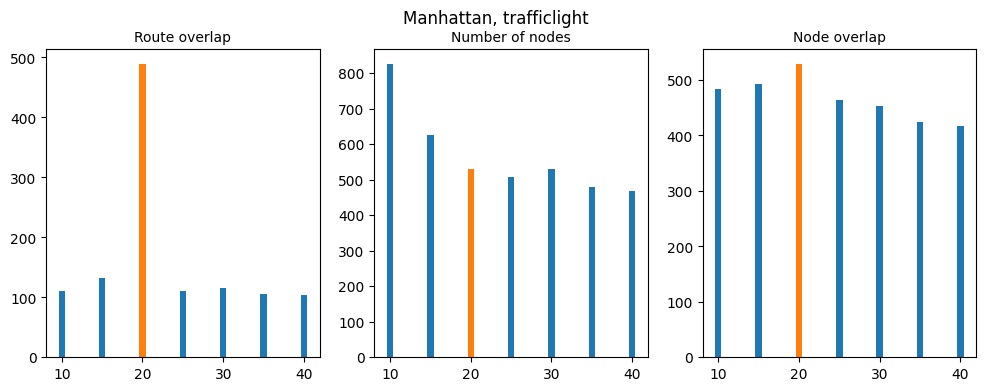

In [52]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=True, figsize=(12, 4))
colors = ['tab:orange' if val == default_value else 'tab:blue'  for val in param_values]

ax0.set_title('Route overlap', fontsize=10)
ax0.bar(*zip(*shared_route_dict.items()), color=colors)

ax1.set_title('Number of nodes', fontsize=10)
ax1.bar(*zip(*num_nodes_dict.items()), color=colors)

ax2.set_title('Node overlap', fontsize=10)
ax2.bar(*zip(*node_overlap_dict.items()), color=colors)

fig.suptitle(f'{city}, {vary_param}')
plt.show()